In [171]:
import numpy as np
import pandas as pd

In [172]:
# 訓練データ
df_train = pd.read_csv('data/kaggle/Spaceship_Titanic/train.csv', index_col=0, header=[0], parse_dates=[0])

In [173]:
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [174]:
df_train["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [175]:
df_train["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [176]:
df_train["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [177]:
df_train["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [178]:
df_train["RoomService"].value_counts()

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

In [179]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [180]:
df_train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [181]:
df_train[df_train['RoomService'].isnull() == True]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False
0031_03,Mars,False,F/9/P,TRAPPIST-1e,20.0,False,NaN,0.0,1750.0,990.0,0.0,Dontch Datie,True
0091_01,Earth,True,G/16/S,TRAPPIST-1e,26.0,False,NaN,0.0,0.0,0.0,0.0,Deanne Yorkland,True
0141_01,Mars,False,F/30/P,TRAPPIST-1e,31.0,False,NaN,0.0,97.0,0.0,0.0,Pyrohs Harte,False
0193_02,Mars,False,F/41/P,TRAPPIST-1e,23.0,False,NaN,0.0,8.0,1072.0,0.0,Frook Raf,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998_02,Earth,False,E/591/S,TRAPPIST-1e,47.0,False,NaN,1.0,0.0,967.0,5.0,Jonaye Englence,False
9026_01,Earth,True,G/1463/P,TRAPPIST-1e,58.0,False,NaN,0.0,0.0,0.0,0.0,Mathy Boyers,True
9101_01,Earth,False,F/1865/P,TRAPPIST-1e,21.0,False,NaN,0.0,496.0,430.0,0.0,Gera Frazie,False


In [182]:
df_cabin = df_train['Cabin'].str.split('/',expand=True)

In [183]:
df_cabin.rename(columns={0:"deck", 1:"num", 2:"side"}, inplace=True)

In [184]:
df_cabin["deck"].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: deck, dtype: int64

In [185]:
df_cabin["side"].value_counts()

S    4288
P    4206
Name: side, dtype: int64

In [186]:
df_train2 = pd.concat([df_train, df_cabin], axis=1)

In [187]:
# 数値化できるものだけをピックアップ
# 不要な列の削除
#drop_columns = ['Cabin','Name','Transported', 'Age', "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "num"]
drop_columns = ['Cabin','Name']
df_train2 = df_train2.drop(drop_columns, axis=1)

In [188]:
df_train2 

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S


In [192]:
# 欠損値NaNを異なる値で置換
#df_train2['HomePlanet'].fillna(df_train2['HomePlanet'].mode())
df_traintst = df_train2.fillna(df_train2['HomePlanet'].mode().iloc[0])

In [193]:
df_traintst.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
deck            0
num             0
side            0
dtype: int64

In [194]:
df_traintst

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S


In [162]:
df_train['HomePlanet'].mode()

0    Earth
dtype: object

In [163]:
df_train["Age"].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [197]:
# 欠損値NaNを異なる値で置換
#df_train2['HomePlanet'].fillna(df_train2['HomePlanet'].mode())
df_train2['HomePlanet'] = df_train2['HomePlanet'].fillna(df_train2['HomePlanet'].mode())

In [198]:
df_train2.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
deck            199
num             199
side            199
dtype: int64

In [125]:
# 欠損値NaNを異なる値で置換
df_train2 = df_train2.fillna({'RoomService': 0, 'FoodCourt': 0, 'ShoppingMall': 0, 'Spa': 0, 'VRDeck': 0})

In [127]:
# NaNが一つでもある行を削除
df_train2 = df_train2.dropna(how='any')

In [128]:
df_train2

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S


In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [130]:
# それぞれを数値に置換
df_train2['HomePlanet'] = le.fit_transform(df_train2['HomePlanet'])
df_train2['CryoSleep'] = le.fit_transform(df_train2['CryoSleep'])
df_train2['Destination'] = le.fit_transform(df_train2['Destination'])
df_train2['VIP'] = le.fit_transform(df_train2['VIP'])
df_train2['deck'] = le.fit_transform(df_train2['deck'])
df_train2['side'] = le.fit_transform(df_train2['side'])
df_train2['Transported'] = le.fit_transform(df_train2['Transported'])

In [131]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# sc.fit_transform(train[['Age']]) # 2次元配列のin,out

In [132]:
# 各変数を平均0、標準偏差1に揃える方法（sklearn.preprocessing.StandardScaler）
df_train2['Age'] = sc.fit_transform(df_train2[['Age']])
df_train2['RoomService'] = sc.fit_transform(df_train2[['RoomService']])
df_train2['FoodCourt'] = sc.fit_transform(df_train2[['FoodCourt']])
df_train2['ShoppingMall'] = sc.fit_transform(df_train2[['ShoppingMall']])
df_train2['Spa'] = sc.fit_transform(df_train2[['Spa']])
df_train2['VRDeck'] = sc.fit_transform(df_train2[['VRDeck']])

In [133]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0, 1), copy=True)

In [134]:
# 各変数を最小値0、最大値1に揃える方法（sklearn.preprocessing.MinMaxScaler）
df_train2['num'] = mms.fit_transform(df_train2[['num']].astype('float'))

In [135]:
df_train2

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
PassengerId,,,,,,,,,,,,,,
0001_01,1,0,2,0.700056,0,-0.343005,-0.280208,-0.283422,-0.271830,-0.262148,0,1,0.000000,0
0002_01,0,0,2,-0.333740,0,-0.172339,-0.274679,-0.243259,0.224506,-0.223997,1,5,0.000000,1
0003_01,1,0,2,2.009531,1,-0.275678,1.916388,-0.283422,5.799013,-0.219662,0,0,0.000000,1
0003_02,1,0,2,0.286538,0,-0.343005,0.507889,0.312604,2.737826,-0.094804,0,0,0.000000,1
0004_01,0,0,2,-0.885098,0,0.131414,-0.237210,-0.040835,0.238971,-0.260414,1,5,0.000528,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,1,0,0,0.837895,1,-0.343005,3.908435,-0.283422,1.213560,-0.197985,0,0,0.051742,0
9278_01,0,1,1,-0.747258,0,-0.343005,-0.280208,-0.283422,-0.271830,-0.262148,0,6,0.791447,1
9279_01,0,0,2,-0.195901,0,-0.343005,-0.280208,2.724022,-0.270926,-0.262148,1,6,0.791975,1


In [136]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7572 entries, 0001_01 to 9280_02
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7572 non-null   int32  
 1   CryoSleep     7572 non-null   int32  
 2   Destination   7572 non-null   int32  
 3   Age           7572 non-null   float64
 4   VIP           7572 non-null   int32  
 5   RoomService   7572 non-null   float64
 6   FoodCourt     7572 non-null   float64
 7   ShoppingMall  7572 non-null   float64
 8   Spa           7572 non-null   float64
 9   VRDeck        7572 non-null   float64
 10  Transported   7572 non-null   int64  
 11  deck          7572 non-null   int32  
 12  num           7572 non-null   float64
 13  side          7572 non-null   int32  
dtypes: float64(7), int32(6), int64(1)
memory usage: 709.9+ KB


In [137]:
# 属性を変更
df_train2 = df_train2.astype('float64')

In [96]:
# 分類化されているもののみをピックアップ
drop_columns = ['Age', "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "num"]
df_trainchk = df_train2.drop(drop_columns, axis=1)

In [97]:
# 相関係数
# df_corr = df_corr = df_score.corr()
df_corr = df_trainchk.corr()

In [98]:
df_corr

,HomePlanet,CryoSleep,Destination,VIP,Transported,deck,side
HomePlanet,1.000000,0.082662,0.042876,0.128737,0.111588,-0.419570,-0.003019
CryoSleep,0.082662,1.000000,-0.097164,-0.081929,0.461480,0.026445,0.017257
Destination,0.042876,-0.097164,1.000000,-0.041570,-0.119800,0.186746,-0.002733
VIP,0.128737,-0.081929,-0.041570,1.000000,-0.039334,-0.196318,-0.007772
Transported,0.111588,0.461480,-0.119800,-0.039334,1.000000,-0.111491,0.106385
deck,-0.419570,0.026445,0.186746,-0.196318,-0.111491,1.000000,-0.037547
side,-0.003019,0.017257,-0.002733,-0.007772,0.106385,-0.037547,1.000000


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

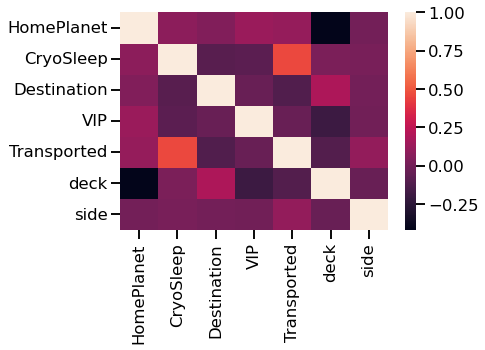

In [100]:
sns.heatmap(df_corr)

<AxesSubplot:>

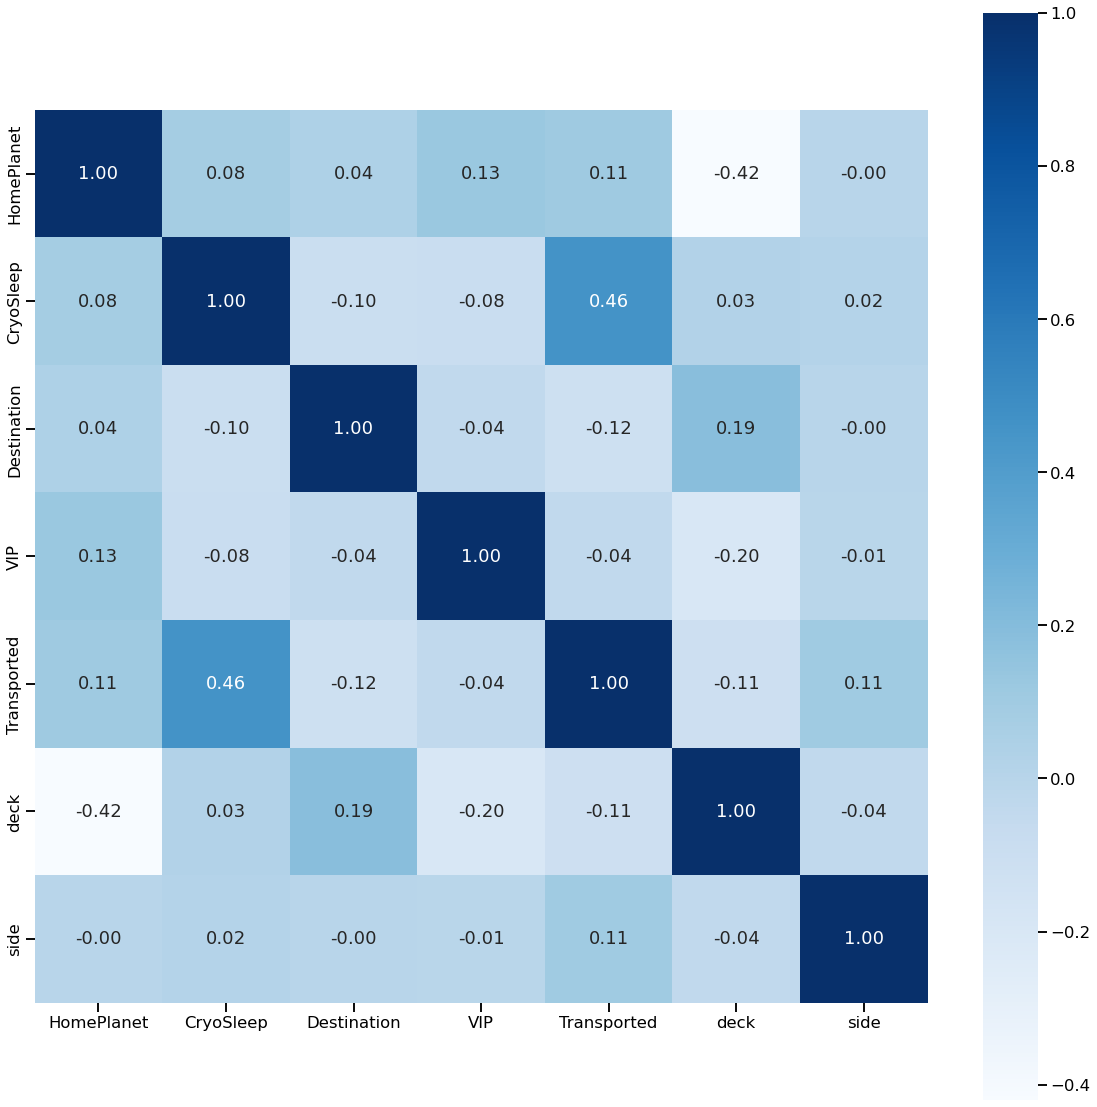

In [101]:
sns.set_context("talk")
fig = plt.subplots(figsize=(20, 20))
 
sns.heatmap(df_corr, annot=True,fmt='.2f',cmap='Blues',square=True)

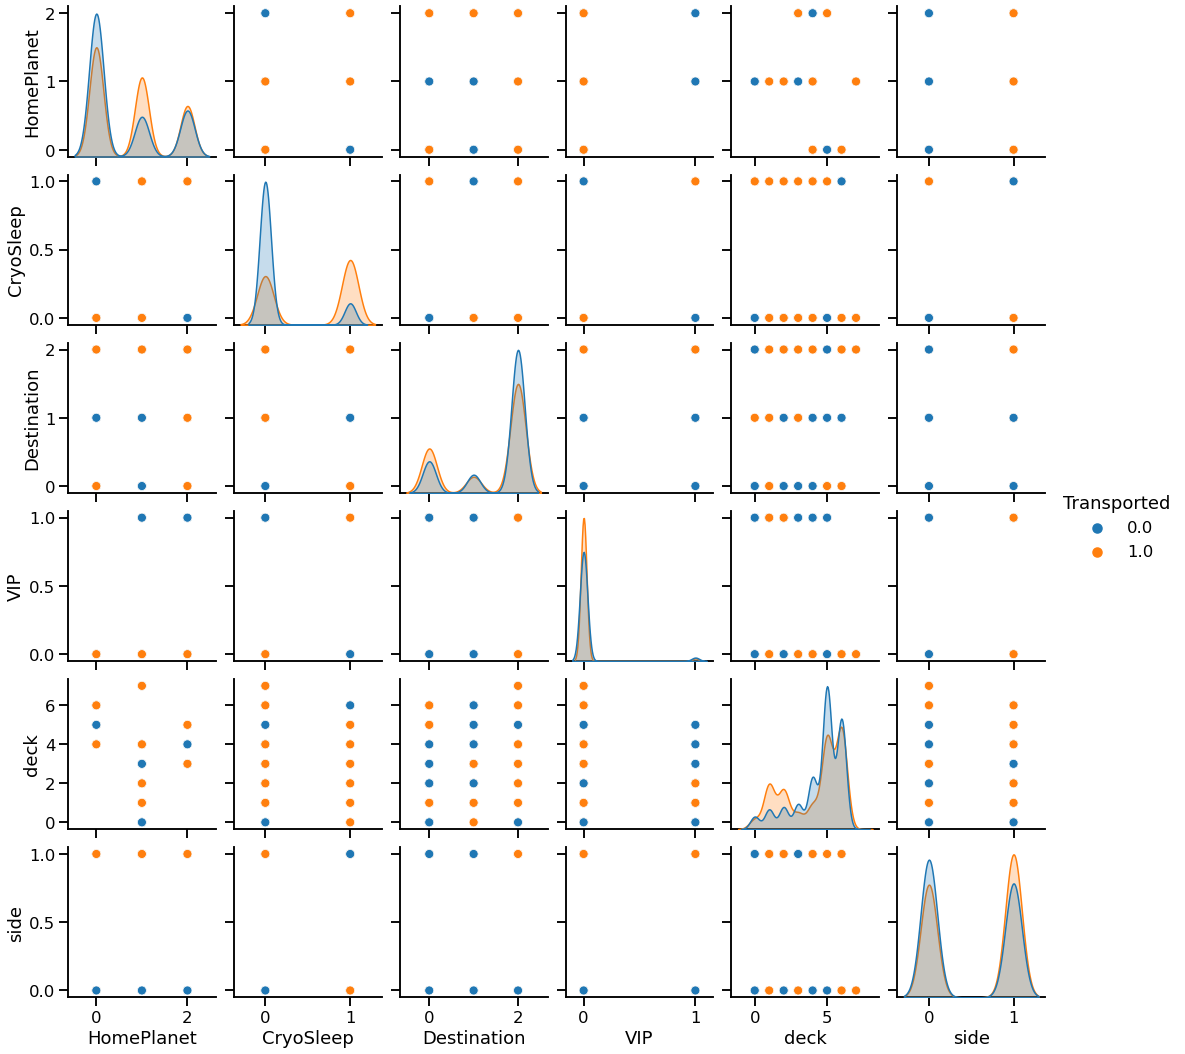

In [102]:
sns.pairplot(df_trainchk,hue="Transported")

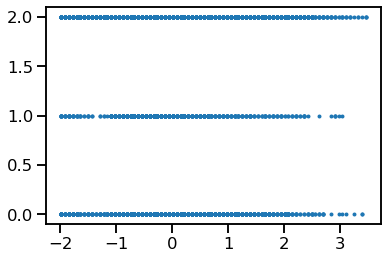

In [145]:
# 散布図 ->相関関係を見つけられず
plt.scatter(df_train2['Age'], df_train2['Destination'],  s=6)

In [148]:
# Testデータ
df_test = pd.read_csv('data/kaggle/Spaceship_Titanic/test.csv', index_col=0, header=[0], parse_dates=[0])

In [157]:
df_test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [158]:
df_cabin = df_test['Cabin'].str.split('/',expand=True)
df_cabin.rename(columns={0:"deck", 1:"num", 2:"side"}, inplace=True)
df_test2 = pd.concat([df_test, df_cabin], axis=1)
drop_columns = ['Cabin','Name']
df_test2 = df_test2.drop(drop_columns, axis=1)
# 欠損値NaNを異なる値で置換
df_test2 = df_test2.fillna({'RoomService': 0, 'FoodCourt': 0, 'ShoppingMall': 0, 'Spa': 0, 'VRDeck': 0})
# NaNが一つでもある行を削除
#df_test2 = df_test2.dropna(how='any')
# それぞれを数値に置換
df_test2['HomePlanet'] = le.fit_transform(df_test2['HomePlanet'])
df_test2['CryoSleep'] = le.fit_transform(df_test2['CryoSleep'])
df_test2['Destination'] = le.fit_transform(df_test2['Destination'])
df_test2['VIP'] = le.fit_transform(df_test2['VIP'])
df_test2['deck'] = le.fit_transform(df_test2['deck'])
df_test2['side'] = le.fit_transform(df_test2['side'])
# df_test2['Transported'] = le.fit_transform(df_test2['Transported'])
# 各変数を平均0、標準偏差1に揃える方法（sklearn.preprocessing.StandardScaler）
df_test2['Age'] = sc.fit_transform(df_test2[['Age']])
df_test2['RoomService'] = sc.fit_transform(df_test2[['RoomService']])
df_test2['FoodCourt'] = sc.fit_transform(df_test2[['FoodCourt']])
df_test2['ShoppingMall'] = sc.fit_transform(df_test2[['ShoppingMall']])
df_test2['Spa'] = sc.fit_transform(df_test2[['Spa']])
df_test2['VRDeck'] = sc.fit_transform(df_test2[['VRDeck']])
# 各変数を最小値0、最大値1に揃える方法（sklearn.preprocessing.MinMaxScaler）
df_test2['num'] = mms.fit_transform(df_test2[['num']].astype('float'))
# 属性を変更
df_test2 = df_test2.astype('float64')

In [159]:
# 特徴量の選択
cols = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',  'deck', 'num', 'side']

# 学習用
X_train = df_train2[cols]
y_train = df_train2['Transported']

# 予測用
X_test = df_test2[cols]

In [160]:
from sklearn.linear_model import LogisticRegression

# モデル作成（ロジスティック回帰）
model = LogisticRegression(solver='liblinear', random_state=42)

# 学習
model.fit(X_train, y_train)
# 予測
y_test = model.predict(X_test)

pd.Series(y_test).value_counts()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [156]:
from sklearn.ensemble import RandomForestClassifier

# モデル作成（ランダムフォレスト）
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# 学習
model.fit(X_train, y_train)
# 予測
y_test = model.predict(X_test)

pd.Series(y_test).value_counts()

0.0    2849
1.0     908
dtype: int64